<a href="https://colab.research.google.com/github/Sankalp2808/A.Y.-2022-23_S.E.-III-Mini-Project-1A/blob/main/DSW_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install pandas matplotlib seaborn openpyxl scikit-learn

# Import necessary libraries
import pandas as pd

# Load the datasets
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

# Display data overview
print("Training Data Overview:")
print(train_data.head())
print("\nTest Data Overview:")
print(test_data.head())


Training Data Overview:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

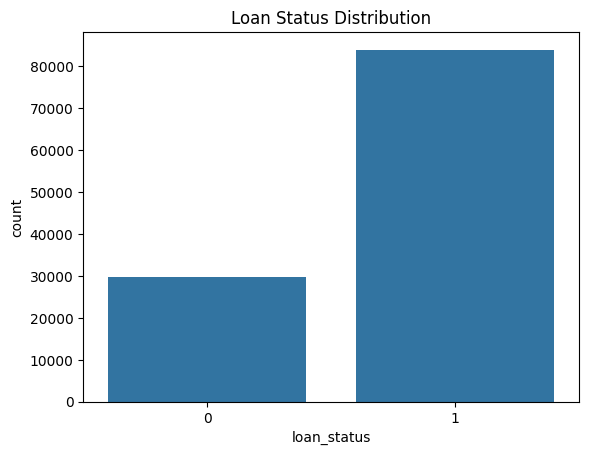

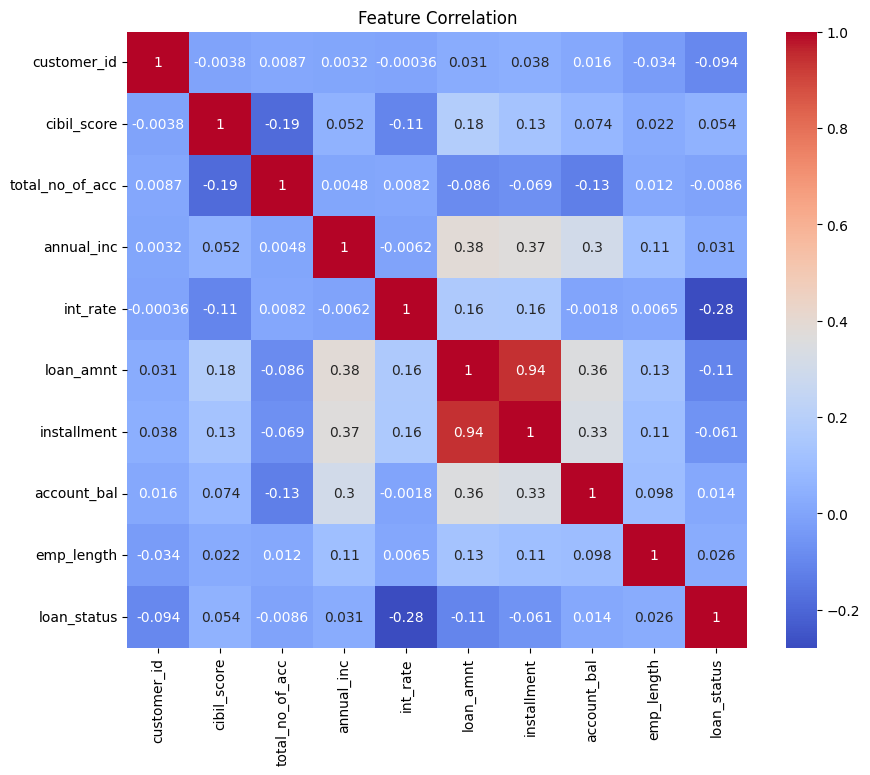

In [3]:
# Basic summary
print(train_data.info())
print(train_data.describe())

# Check for missing values
print("Missing Values:\n", train_data.isnull().sum())

# Visualization examples
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of loan_status
sns.countplot(x='loan_status', data=train_data)
plt.title("Loan Status Distribution")
plt.show()

# Correlation heatmap (Updated Code)
# Select only numeric columns for correlation
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Handle missing values (example: filling with median)
numeric_data = numeric_data.fillna(numeric_data.median())

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

class ModelPipeline:
    def __init__(self, model):
        self.model = model

    def load(self, data):
        """
        Load the dataset and split into features (X) and target (y).
        """
        X = data.drop(columns=['loan_status', 'customer_id'])  # Drop target and ID
        y = data['loan_status']  # Target column
        return X, y

    def preprocess(self, X):
        """
        Preprocess the features: handle datetime columns and categorical variables.
        """
        # Convert 'transaction_date' into numerical features
        if 'transaction_date' in X.columns:
            X['transaction_year'] = pd.to_datetime(X['transaction_date']).dt.year
            X['transaction_month'] = pd.to_datetime(X['transaction_date']).dt.month
            X['transaction_day'] = pd.to_datetime(X['transaction_date']).dt.day
            X = X.drop(columns=['transaction_date'])  # Drop original column

        # One-hot encode categorical variables
        X = pd.get_dummies(X, drop_first=True)

        # Fill any missing values with the median
        X = X.fillna(X.median())

        return X

    def train(self, X_train, y_train):
        """
        Train the model on the training data.
        """
        self.model.fit(X_train, y_train)

    def test(self, X_test, y_test):
        """
        Test the model and display evaluation metrics.
        """
        predictions = self.model.predict(X_test)
        print("Model Evaluation:")
        print(classification_report(y_test, predictions))
        print("Accuracy:", accuracy_score(y_test, predictions))

    def predict(self, X):
        """
        Make predictions on new data.
        """
        return self.model.predict(X)

if __name__ == "__main__":
    # Load the training data
    train_data = pd.read_excel('train_data.xlsx')

    # Initialize pipelines for both models
    pipeline_rf = ModelPipeline(RandomForestClassifier(random_state=42))
    pipeline_lr = ModelPipeline(LogisticRegression(max_iter=500, random_state=42))

    # Load and preprocess the data
    X, y = pipeline_rf.load(train_data)
    X = pipeline_rf.preprocess(X)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Model
    print("Random Forest Results:")
    pipeline_rf.train(X_train, y_train)
    pipeline_rf.test(X_test, y_test)

    # Logistic Regression Model
    print("\nLogistic Regression Results:")
    pipeline_lr.train(X_train, y_train)
    pipeline_lr.test(X_test, y_test)


Random Forest Results:
Model Evaluation:
              precision    recall  f1-score   support

           0       0.59      0.29      0.39      5917
           1       0.79      0.93      0.85     16824

    accuracy                           0.76     22741
   macro avg       0.69      0.61      0.62     22741
weighted avg       0.74      0.76      0.73     22741

Accuracy: 0.7619277956114506

Logistic Regression Results:
Model Evaluation:
              precision    recall  f1-score   support

           0       0.56      0.19      0.29      5917
           1       0.77      0.95      0.85     16824

    accuracy                           0.75     22741
   macro avg       0.67      0.57      0.57     22741
weighted avg       0.72      0.75      0.70     22741

Accuracy: 0.7512422496811926


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_model = RandomForestClassifier()
scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Scores:", scores_rf)
print("Random Forest Mean Score:", scores_rf.mean())

# Cross-validation for Logistic Regression
lr_model = LogisticRegression(max_iter=500)
scores_lr = cross_val_score(lr_model, X, y, cv=5)
print("Logistic Regression CV Scores:", scores_lr)
print("Logistic Regression Mean Score:", scores_lr.mean())

# Final selection based on evaluation
if scores_rf.mean() > scores_lr.mean():
    print("Random Forest selected as the final model.")
else:
    print("Logistic Regression selected as the final model.")


Random Forest CV Scores: [0.73910558 0.35490963 0.44153731 0.59579614 0.51220263]
Random Forest Mean Score: 0.5287102590035618


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Scores: [0.74834    0.72050482 0.75067059 0.75242953 0.72842003]
Logistic Regression Mean Score: 0.74007299591047
Logistic Regression selected as the final model.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
